<a href="https://colab.research.google.com/github/Guerouan/machine-learning/blob/master/Predicting_Boston's_expenses_ws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to machine learning**

---


**Resume:** In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from houses in Boston’s suburbs.
Once we get a good fit, we will use this model to predict the monetary value of a house located at the Boston’s area.
A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.



## **1: Taking data into account**


The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:

-CRIM: This is the per capita crime rate by town

-ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.

-INDUS: This is the proportion of non-retail business acres per town.

-CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)

-NOX: This is the nitric oxides concentration (parts per 10 million)

-RM: This is the average number of rooms per dwelling

-AGE: This is the proportion of owner-occupied units built prior to 1940

-DIS: This is the weighted distances to five Boston employment centers

-RAD: This is the index of accessibility to radial highways

-TAX: This is the full-value property-tax rate per $10,000

-PTRATIO: This is the pupil-teacher ratio by town

-B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town

-LSTAT: This is the percentage lower status of the population

-MEDV: This is the median value of owner-occupied homes in $1000s

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy 
! pip install shap
import shap

# read data 
x_train,label = shap.datasets.boston()

     |████████████████████████████████| 235kB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/93/3f/4a/331cf71b5043416aeba0df795e7c204c7ad277673f1938d11b
Successfully built shap


In [2]:
data = x_train.copy()
data["MEDV"] = label
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## **2- Exploration**
Even if the data do not have any particular defects, a preliminary exploratory study is essential in order to ensure their good coherence, propose possible transformations and analyse correlation structures or more generally links between variables, groups of individuals or observations.

### **2.1- One-dimensional exploration**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

(0, 104.855)

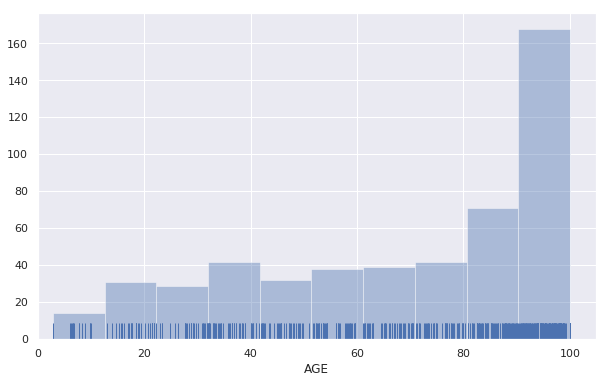

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(data.AGE, bins=10, kde=False, rug=True)
plt.xlim(0, )

(-10, 131.56753473627424)

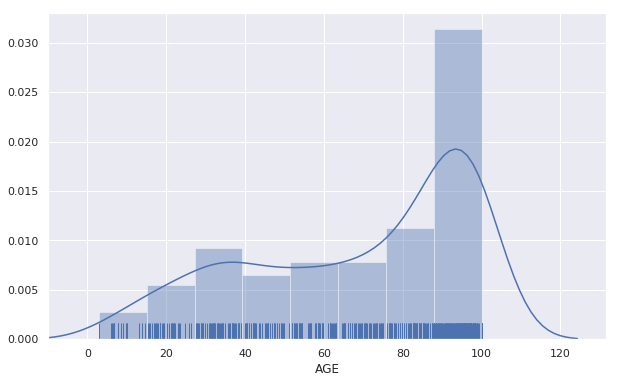

In [6]:
from scipy import stats
plt.figure(figsize=(10,6))
sns.distplot(data.AGE, rug=True)#, fit=stats.gamma);
plt.xlim(-10,)

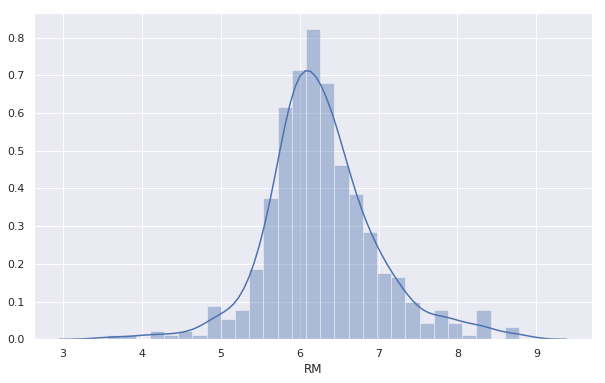

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(data.RM)


**Exercice**:  Deal with all variables in this way and try to extract knowldge

### **2.2-Multi-dimensional Exploration**

In [0]:
#it take time to compute use simple heartmaps

#plt.figure(figsize=(15,15))
#sns.set(style="white")
#g = sns.PairGrid(x_train, diag_sharey=False)
#g.map_lower(sns.kdeplot)
#g.map_upper(sns.scatterplot)
#g.map_diag(sns.kdeplot, lw=3)

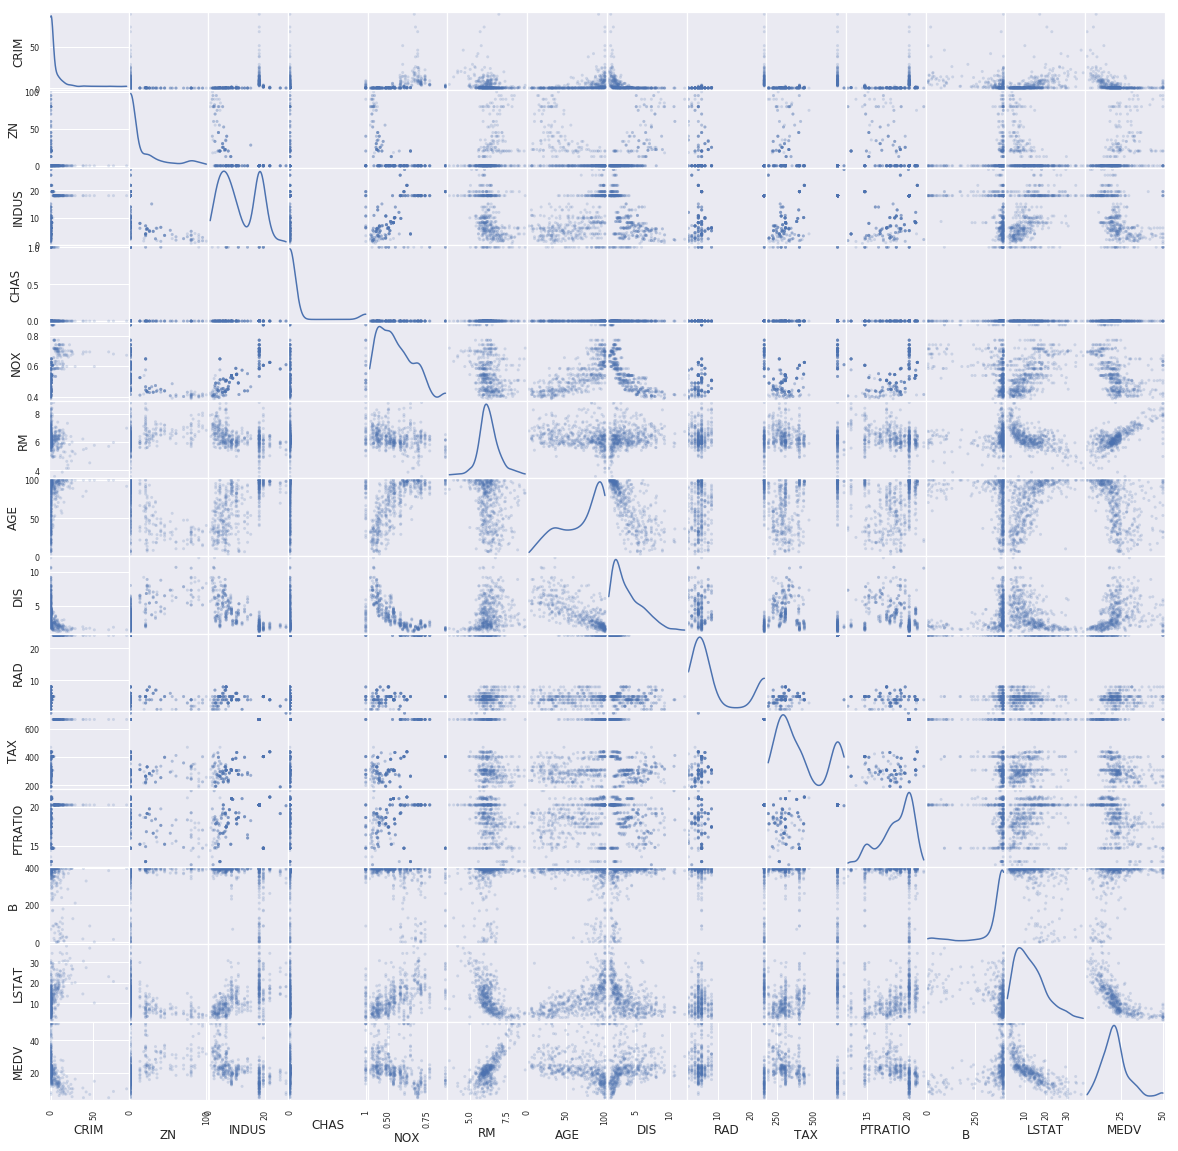

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

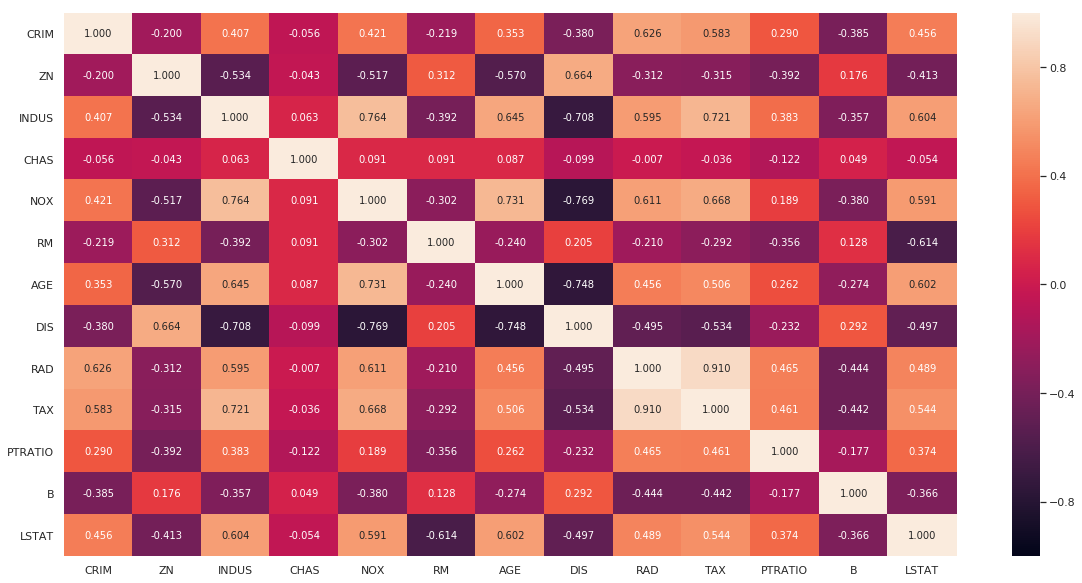

In [10]:
plt.figure(figsize = (20, 10))

sns.heatmap(x_train.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.3f')

In [0]:
data["priceSeuil"]=data["MEDV"].map(lambda x: x > np.mean(label))

### *2.3-Principal component analysis-PCA*

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#features reduction


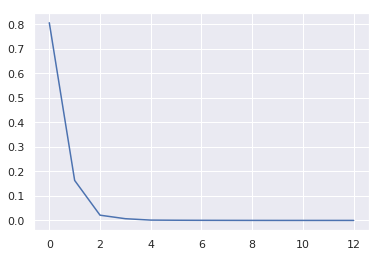

In [13]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(x_train).transform(x_train)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

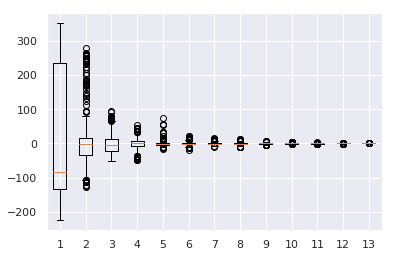

In [14]:
plt.boxplot(C[:,0:20])
plt.show()

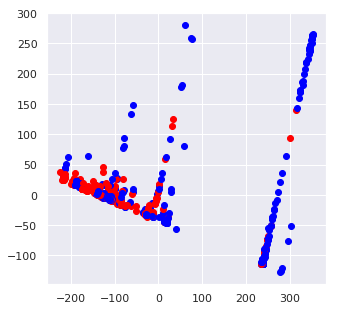

In [15]:
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,1], data["priceSeuil"]):
    color = "red" if nom  else "blue"
    plt.plot(i, j, "o",color=color)  
plt.show()

In [0]:
#coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
#coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
#fig = plt.figure(figsize=(5,5))
#ax = fig.add_subplot(1, 1, 1)
#for i, j, nom in zip(coord1,coord2, x_train.columns):
#    plt.text(i, j, nom)
#    plt.arrow(0,0,i,j,color='black')
# cercle
#c=plt.Circle((0,0), radius=1, color='gray', fill=False)
#ax.add_patch(c)
#plt.show()

In [17]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=8)
clust.fit(x_train)
classe=clust.labels_
print(classe)

[0 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 0 0
 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 7 4 0 0 0 0 0 0 4 7 7 7 7 7 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 4 4 4 4 0 0 0 0 0 4 0 0 0 0 0 0 3 3 5 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 5 3
 3 3 3 3 3 5 3 5 5 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 0 0 0 0 0 0 0 4 4 4 4 4 4
 4 4 7 7 7 7 7 7 4 4 4 7 7 7 7 7 7 7 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 7 0 0 7 0 7 7 7 7 7 7 7 7 4 0 0
 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 7 4 7 0 7 4 4 4 0 0 0
 0 0 7 7 7 7 7 7 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 7 7
 4 4 4 4 4 4 4 4 0 3 7 7 7 7 7 7 7 7 7 7 4 7 7 1 1 1 1 1 1 1 1 1 1 2 6 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 2 2 2 6 6 6 2 6 6 6 6 6 6 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1
 2 6 2 1 1 2 6 1 1 1 6 6 6 6 2 1 2 1 1 1 1 2 6 2 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 

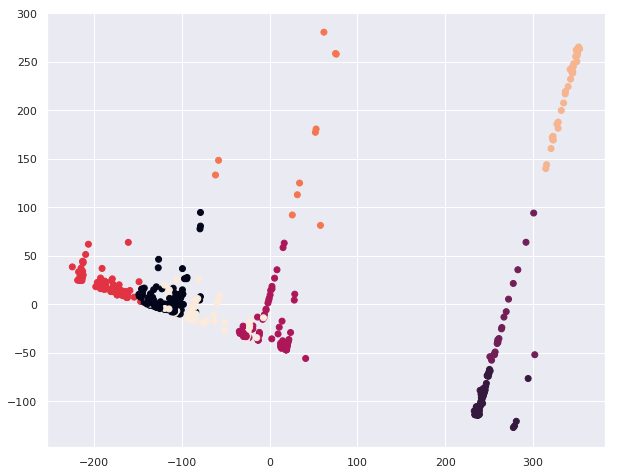

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

## **3-Learining and prediction**


### **3.1- Extraction of learning and test samples**

In [0]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(x_train,label,test_size=200,random_state=11)


**Data Normalizarion**

In [0]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)
# Mais cela ne semnble pas nécessaire sur ces données.
# Les commandes sont donc fournies à titre indicatif.

**Linear regression**
-reg linear
-mse
-r2

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regLasso = linear_model.Lasso()
regLasso.fit(Xr_train, Y_train)
prev = regLasso.predict(Xr_test)
print("MSE=", mean_squared_error(Y_test, prev))
print("R2=", r2_score(Y_test, prev))

MSE= 28.401175030404783
R2= 0.6642960284600323


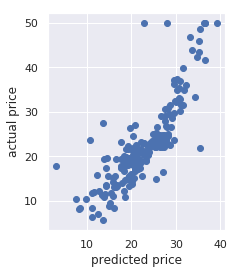

In [30]:
plt.plot(prev,Y_test,"o")
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

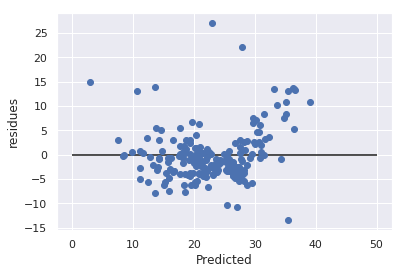

In [35]:
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Predicted")
plt.ylabel(u"residues")
plt.hlines(0, 0, 50)
plt.show()

know we will add a regularization 
-choosing the optimal parametre

In [36]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.652130, Meilleur paramètre = {'alpha': 0.05}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 23.630330497748556
R2= 0.7206877606858244


In [42]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Y_train)
model_lasso.coef_

array([-0.84012164,  0.58294299,  0.00777372,  0.79998117, -1.82038053,
        2.9034859 ,  0.47846684, -2.35714211,  2.23710568, -1.59117101,
       -1.91774562,  1.08842371, -3.78916111])

In [43]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables and delete " +  str(sum(coef == 0)))

Lasso conserve 13 variables et en supprime 0


Text(0.5, 1.0, 'Coefficients du modèle lasso')

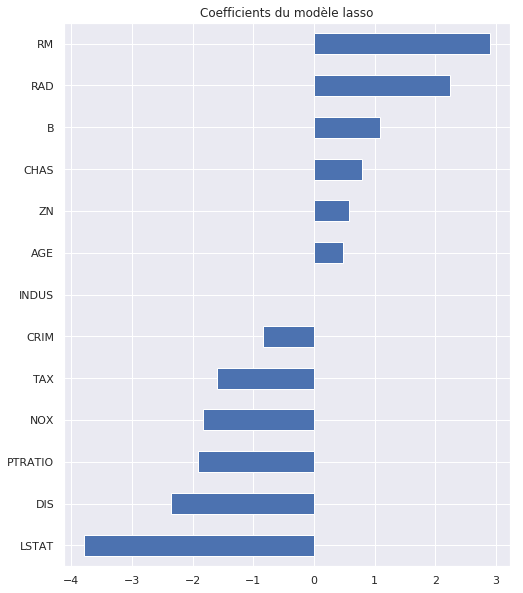

In [44]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

** Decision tree**

In [47]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.313468, Meilleur paramètre = {'max_depth': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
prev=treeOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 16.759759421267223
R2= 0.801898414634234


**Visualization of th decsision Tree**

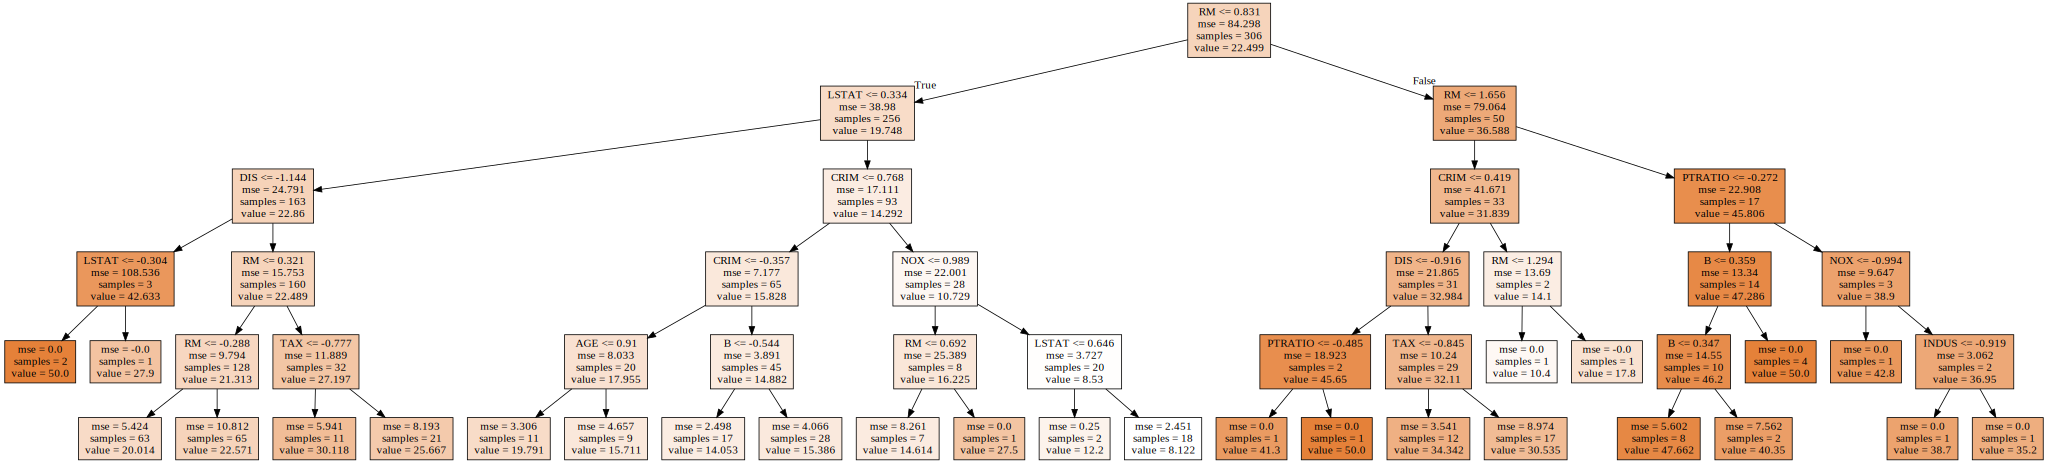

In [67]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pydotplus
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Y_train)


labels = list(X_train)
#class_names = [str(item) for item in range(20)]
graph = Source(tree.export_graphviz(treeG, out_file=None
   , feature_names=labels
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Random forest**


In [71]:
from sklearn.ensemble import RandomForestRegressor 
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Y_train)
print(rfFit.oob_score_)

0.8383272342028927


In [72]:
prev=forest.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 12.835017353800012
R2= 0.8482891536761301


**use cross validation and greed search**

In [90]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Y_train)
# paramètre optimal
print("Best params = %s" % (rfOpt.best_params_))

Best params = {'max_features': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [77]:
prev=rfOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 10.538684004999991
R2= 0.8754319822508835


In [80]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(data.columns[indices[f]], importances[indices[f]])

LSTAT 0.22857148418448098
RM 0.22798629419738542
PTRATIO 0.08377803573647293
NOX 0.07635821452291339
CRIM 0.06973240373214064
INDUS 0.06115226886630857
DIS 0.0609484198102903
TAX 0.05556241877892624
AGE 0.04196109410617665
B 0.037119848063618135
RAD 0.023429098380079363
ZN 0.020278482656884405
CHAS 0.013121936964323155


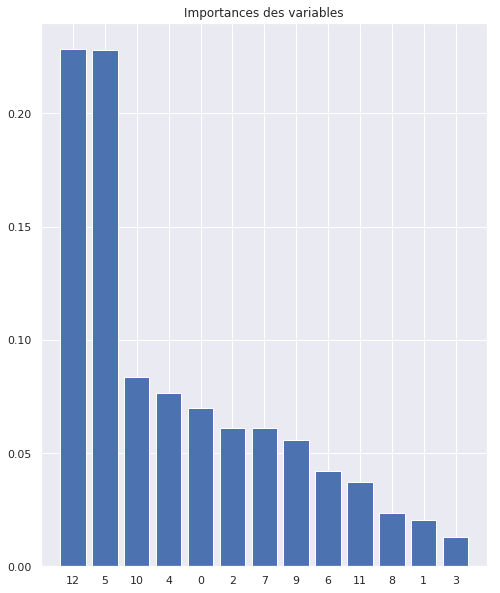

In [81]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]), indices)
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

**Support Vector Machine**

In [85]:
from sklearn.svm import SVR
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Y_train)
# paramètre optimal
print("Best param = %s" % ( svmOpt.best_params_))

Best param = {'C': 1.4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
prev=svmOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 29.72887768880848
R2= 0.6486024856762167


**XGboost**


In [0]:
import xgboost
params = {"objective": "reg:linear", #since it is a regression problem
          "booster" : "gbtree",     #tree
          "eta": 0.03,              #learning rate   to reduce overfitting issues
          "max_depth": 10,          #depth of the tree
          "subsample": 0.9,         #subsample the data prior to growing trees - overcomes overfitting
          "colsample_bytree": 0.7,  #subsampling of columns for each tree
          "silent": 1,              #verbosity
          "seed": 10                
         }
#params = {"learning_rate": 0.01}
num_boost_round = 150         #countinue for 10 itertions
gbm = xgboost.train(params, xgboost.DMatrix(X_train, label=Y_train), num_boost_round,  verbose_eval=True)


In [160]:
prev = gbm.predict(xgboost.DMatrix(X_test))
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 9.628773645704348
R2= 0.8861871894222029


**Interpretabilty**


In [289]:
shap.initjs()
#explain the model prediction using shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)

#visualize prediction explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0, :])


In [155]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [290]:
shap_values.shape[1]

13

In [291]:
shap_values

array([[ 0.39813995,  0.00564151, -0.29092768, ...,  0.6123148 ,
         0.27220368, -4.5945425 ],
       [ 0.45709315,  0.03857293,  0.06628199, ...,  0.871978  ,
         0.27724734,  1.7274157 ],
       [ 0.1969709 , -0.16740428,  0.43463176, ...,  1.1806434 ,
         0.26910907,  2.7120612 ],
       ...,
       [-0.0224088 , -0.01093261, -0.01538552, ..., -0.08735479,
         0.05353882,  3.5859976 ],
       [ 0.30337182, -0.04588868,  0.27843764, ...,  0.99284977,
         0.23827457,  5.349331  ],
       [-1.3446038 ,  0.00869634,  0.07946511, ...,  0.07460732,
         0.16699643, -3.9970646 ]], dtype=float32)

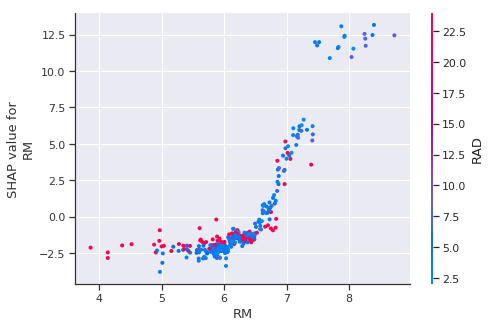

In [171]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X_train)

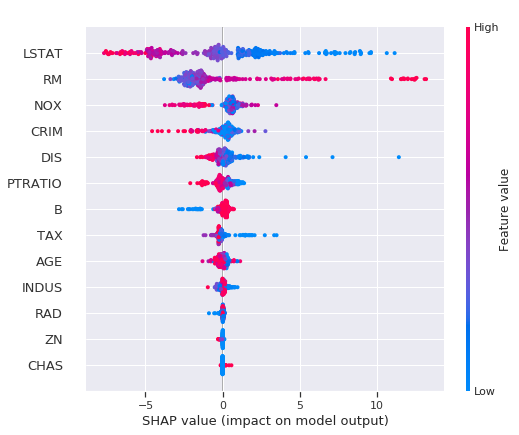

In [173]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

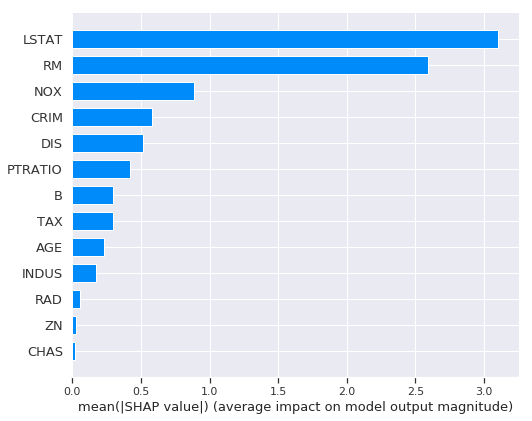

In [175]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [168]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,3.720793,9.578431,11.053595,0.058824,0.554025,6.265121,68.589869,3.841625,9.931373,410.421569,18.473856,355.356275,12.647386
std,8.774442,20.320838,6.679268,0.235680,0.116966,0.708720,27.152140,2.118366,8.853925,170.082917,2.112671,92.231837,7.062556
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,6.200000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080603,0.000000,5.190000,0.000000,0.449000,5.878500,45.725000,2.122250,4.000000,279.000000,17.400000,373.852500,7.390000
50%,0.253715,0.000000,9.690000,0.000000,0.535000,6.190000,75.500000,3.324600,5.000000,330.000000,18.950000,391.385000,11.310000
75%,3.821375,0.000000,18.100000,0.000000,0.624000,6.623500,93.525000,5.276650,24.000000,666.000000,20.200000,395.930000,16.492500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Neural Network**

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [200]:
model.fit(
    Xr_train,
    Y_train,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 1s - loss: 573.9797
Epoch 2/50
 - 0s - loss: 532.7471
Epoch 3/50
 - 0s - loss: 475.7695
Epoch 4/50
 - 0s - loss: 385.9222
Epoch 5/50
 - 0s - loss: 262.4593
Epoch 6/50
 - 0s - loss: 136.0514
Epoch 7/50
 - 0s - loss: 79.0790
Epoch 8/50
 - 0s - loss: 62.5916
Epoch 9/50
 - 0s - loss: 45.0929
Epoch 10/50
 - 0s - loss: 35.9227
Epoch 11/50
 - 0s - loss: 30.0354
Epoch 12/50
 - 0s - loss: 26.0593
Epoch 13/50
 - 0s - loss: 23.3471
Epoch 14/50
 - 0s - loss: 21.2310
Epoch 15/50
 - 0s - loss: 19.5573
Epoch 16/50
 - 0s - loss: 18.2721
Epoch 17/50
 - 0s - loss: 17.1542
Epoch 18/50
 - 0s - loss: 16.0431
Epoch 19/50
 - 0s - loss: 15.2133
Epoch 20/50
 - 0s - loss: 14.5709
Epoch 21/50
 - 0s - loss: 13.9529
Epoch 22/50
 - 0s - loss: 13.4260
Epoch 23/50
 - 0s - loss: 13.0581
Epoch 24/50
 - 0s - loss: 12.6001
Epoch 25/50
 - 0s - loss: 12.3648
Epoch 26/50
 - 0s - loss: 11.9669
Epoch 27/50
 - 0s - loss: 11.7905
Epoch 28/50
 - 0s - loss: 11.4880
Epoch 29/50
 - 0s - loss: 11.3328
Epoch 30/50
 - 0s

In [201]:
prev = model.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 15.746373206002804
R2= 0.8138767140110704


In [293]:

e = shap.DeepExplainer(model= model, data=Xr_train)

shap_values = e.shap_values(Xr_train)
shap.initjs()
shap.force_plot(e.expected_value, shap_values[0][0], X_train.iloc[0,:])

In [302]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(e.expected_value, shap_values[0], X_train)

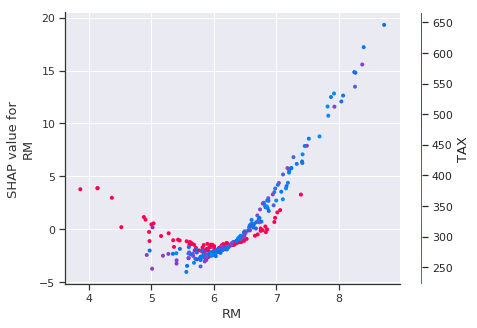

In [300]:
#create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values[0], X_train)

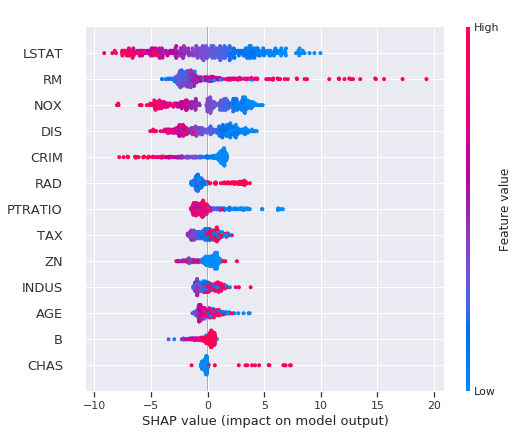

In [305]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], X_train)

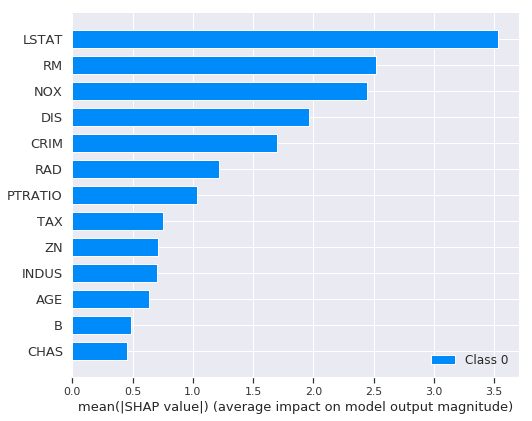

In [306]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Compare models**

In [0]:
listMethod=[["RF",rfOpt],["NN",model],["Tree",treeOpt],["xgb",gbm],["regLass",regLassOpt],["svm", svmOpt]]